<a href="https://colab.research.google.com/github/rohit8077/Python-Development/blob/main/Using_the_Pandas_library%2C_load_a_CSV_file_and_perform_basic_data_analysis_tasks%2C_such_as_calculating_the_average_of_a_selected_column_Additionally%2C_use_Matplotlib_to_create_visualizations%2C_including_bar_charts%2C_scatter_plots%2C_and_heatmaps%2C_to_analyze_t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pillow


In [ ]:
from PIL import Image, ImageDraw, ImageFont

def text_to_image(text, image_name="text_image.png", font_size=40, image_size=(500, 300)):
    # Create an image with white background
    img = Image.new("RGB", image_size, "white")
    draw = ImageDraw.Draw(img)

    # Load a default font
    try:
        font = ImageFont.truetype("arial.ttf", font_size)  # Ensure arial.ttf is available
    except IOError:
        font = ImageFont.load_default()

    # Get text size
    text_width = draw.textlength(text, font=font)
    # Use textsize instead of getsize to get text dimensions
    text_width, text_height = draw.textsize(text, font=font) #This line is changed

    # Calculate text position (centered)
    position = ((image_size[0] - text_width) // 2, (image_size[1] - text_height) // 2)

    # Draw text on image
    draw.text(position, text, fill="black", font=font)

    # Save the image
    img.save(image_name)
    print(f"Image saved as {image_name}")

# Example usage
text = "Hello, World!"
text_to_image(text)


AttributeError: 'ImageDraw' object has no attribute 'textsize'

In [ ]:
print(df.info())
print(df.describe())

print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

In [ ]:
average_sales = df["sepal_length"].mean()
print(f"Average sepal length: {average_sales}")



Average sepal length: 5.843333333333334


In [ ]:
# Assuming you want to fill missing values in 'sepal_length' column
df["sepal_length"].fillna(df["sepal_length"].mean(), inplace=True)


<ipython-input-24-cda52ae76956>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sepal_length"].fillna(df["sepal_length"].mean(), inplace=True)


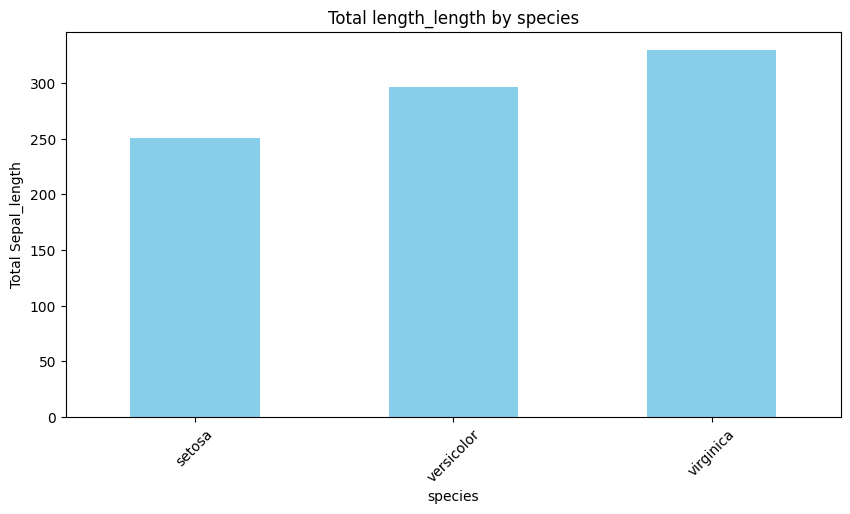

In [ ]:
#bar Chart
plt.figure(figsize=(10, 5))
df.groupby("species")["sepal_length"].sum().plot(kind="bar", color="skyblue")
plt.title("Total length_length by species")
plt.xlabel("species")
plt.ylabel("Total Sepal_length")
plt.xticks(rotation=45)
plt.show()



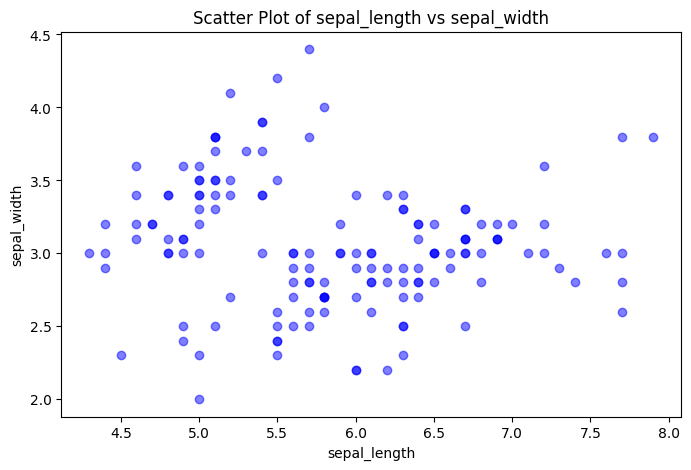

In [ ]:
#heatmap
plt.figure(figsize=(8,5))
# Replace "column_x" and "column_y" with actual column names from your DataFrame
plt.scatter(df["sepal_length"], df["sepal_width"], alpha=0.5, color="blue")
plt.title("Scatter Plot of sepal_length vs sepal_width")  # Update the title accordingly
plt.xlabel("sepal_length")  # Update the x-axis label
plt.ylabel("sepal_width")  # Update the y-axis label
plt.show()

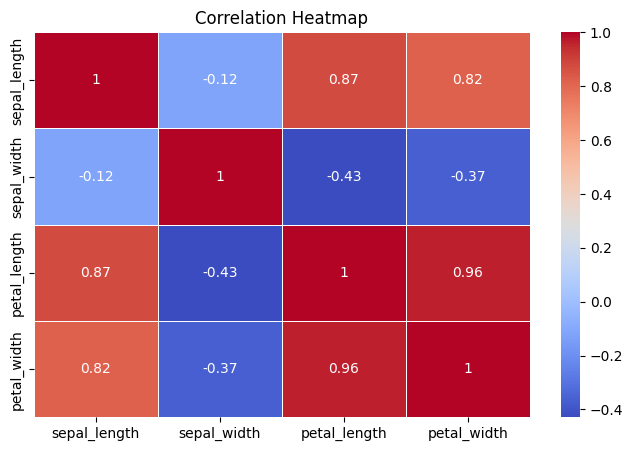

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", linewidths=0.5) # Select only numerical features for correlation
plt.title("Correlation Heatmap")
plt.show()

